In [1]:
# all the imports
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from PIL import Image, ImageFilter, ImageDraw

In [17]:
'''
Original code:
'''

# original_images = []
# pixelated_images = []
# blurred_images = []

# DOWNSAMPLE_TO = 64
# BLUR_INTENSITY = 3

# i = 0
# for img_path in glob.iglob('lfw/*/*.jpg'):
# #     if i == 10000:
# #         break
#     # Open image
#     img = Image.open(img_path)
#     img = img.resize((256, 256), resample=Image.BILINEAR)
    
#     # Resize smoothly down to 32x32 pixels using BILINEAR interpolation
#     # small_img = img.resize((DOWNSAMPLE_TO,DOWNSAMPLE_TO),resample=Image.BILINEAR)
    
#     # Scale back up using NEAREST to original size
#     pixelated_img = small_img.resize(img.size,resample=Image.NEAREST)
    
#     # Get the blurred image using Gaussian Blur
# #     blurred_img = img.filter(ImageFilter.GaussianBlur(radius=BLUR_INTENSITY))
    
# #     original_images.append(np.array(img))
#     pixelated_images.append(np.array(pixelated_img))
# #     blurred_images.append(np.array(blurred_img))
    
#     i += 1

# # original_images = np.array(original_images, dtype='float') / 255.0
# pixelated_images = np.array(pixelated_images, dtype='float') / 255.0
# # blurred_images = np.array(blurred_images, dtype='float') / 255.0

'\nOriginal code:\n'

# Original Images

In [18]:
original_images = []

new_w = new_h = 128

i = 0
for img_path in glob.iglob('*.jpg'):

    # Open image
    img = Image.open(img_path)
    img = img.resize((128, 128), resample=Image.BILINEAR)
    
#     w, h = img.size
    
#     left = (w - new_w)//2
#     top = (h - new_h)//2
#     right = (w + new_w)//2
#     bottom = (h + new_h)//2
    
#     img = img.crop((left, top, right, bottom))
    
    original_images.append(np.array(img))
    
    i += 1

original_images = np.array(original_images, dtype='float') / 255.0

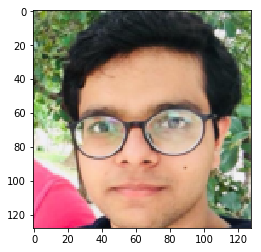

In [19]:
len(original_images)
plt.imshow(original_images[2])

In [20]:
with open('custom_images/original.pickle', 'wb') as f:
    pickle.dump(original_images, f)

# Pixelated Images

In [39]:
# del original_images

pixelated_images = []

DOWNSAMPLE_TO = 20

# new_w = new_h = 128

i = 0
f = open('custom_images/original.pickle','rb')
p1 = pickle.load(f)

for img_path in glob.iglob('*.jpg'):

    img = Image.open(img_path)
    img = img.resize((128, 128), resample=Image.BILINEAR)
    

    # Resize smoothly down to small pixels using BILINEAR interpolation
    small_img = img.resize((DOWNSAMPLE_TO,DOWNSAMPLE_TO),resample=Image.BILINEAR)
    
    # Scale back up using NEAREST to original size
    pixelated_img = small_img.resize(img.size,resample=Image.NEAREST)
    
    del img

    pixelated_images.append(np.array(pixelated_img))
    
    i += 1

pixelated_images = np.array(pixelated_images, dtype='float') / 255.0

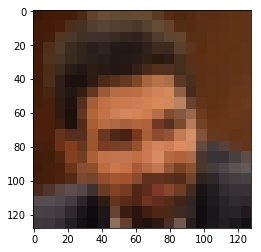

In [40]:
plt.imshow(pixelated_images[0])

In [41]:
with open('custom_images/pixelated-20-prakhar.pickle', 'wb') as f:
    pickle.dump(pixelated_images, f)

# Blurred Images

In [42]:
# del pixelated_images

blurred_images = []

BLUR_INTENSITY = 2.5

i = 0
for img_path in glob.iglob('*.jpg'):
    img = Image.open(img_path)
    img = img.resize((128, 128), resample=Image.BILINEAR)
    
    # Get the blurred image using Gaussian Blur
    blurred_img = img.filter(ImageFilter.GaussianBlur(radius=BLUR_INTENSITY))
    
    del img
    
    blurred_images.append(np.array(blurred_img))
    
    i += 1

blurred_images = np.array(blurred_images, dtype='float') / 255.0

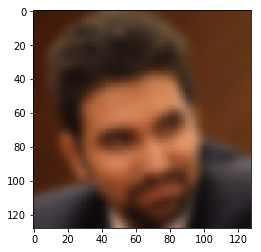

In [43]:
plt.imshow(blurred_images[0])

In [44]:
with open('custom_images/blurred-2.5-prakhar.pickle', 'wb') as f:
    pickle.dump(blurred_images, f)


# Blocked Images

In [8]:
# code to check overlap - https://codereview.stackexchange.com/questions/31352/overlapping-rectangles

class Point(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Rect(object):
    def __init__(self, p1, p2):
        '''Store the top, bottom, left and right values for points 
               p1 and p2 are the (corners) in either order
        '''
        self.left   = min(p1.x, p2.x)
        self.right  = max(p1.x, p2.x)
        self.bottom = min(p1.y, p2.y)
        self.top    = max(p1.y, p2.y)

def overlap(r1, r2):
    '''Overlapping rectangles overlap both horizontally & vertically
    '''
    return range_overlap(r1.left, r1.right, r2.left, r2.right) and range_overlap(r1.bottom, r1.top, r2.bottom, r2.top)

def range_overlap(a_min, a_max, b_min, b_max):
    '''Neither range is completely greater than the other
    '''
    return (a_min <= b_max) and (b_min <= a_max)

In [2]:
import random

blocked_images = []

new_w = new_h = 128

box_size = 30

i = 0
for img_path in glob.iglob('*.jpg'):

    img = Image.open(img_path)
    
    img = img.resize((128, 128), resample=Image.BILINEAR)
    
    draw = ImageDraw.Draw(img)
    
#     overlapping = True
    
#     while (overlapping):
#         # generate coordinates for first box
#         p1 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
#         p2 = Point(p1.x + box_size, p1.y + box_size)
#         r1 = Rect(p1, p2)
        
#         # generate coordinates for second box
#         p3 = Point(random.randint(20, 108-box_size), random.randint(20, 108-box_size))
#         p4 = Point(p3.x + box_size, p3.y + box_size)
#         r2 = Rect(p3, p4)
        
#         overlapping = overlap(r1, r2)
    
    
    draw.rectangle((((128 - box_size) // 2, (128 - box_size) // 2), ((128 + box_size) // 2, (128 + box_size) // 2)), fill="black")
#     draw.rectangle(((r1.left, r1.top), (r1.right, r1.bottom)), fill="black")
    
#     draw.rectangle(((r2.left, r2.top), (r2.right, r2.bottom)), fill="black")
    
    blocked_images.append(np.array(img))
    
    i += 1

blocked_images = np.array(blocked_images, dtype='float') / 255.0

4


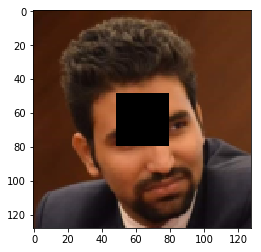

In [3]:
print(len(blocked_images))
plt.imshow(blocked_images[3])

In [6]:
with open('custom_images/blocked-center-prakhar.pickle', 'wb') as f:
    pickle.dump(blocked_images, f)

In [ ]:
f = open('datasets/blocked-40.pickle','rb')
p = f.load()
plt.